In [29]:
import sys
import os
from pathlib import Path

# Adiciona o diretório raiz do projeto ao Python path
project_root = Path.cwd().parent  # Ajuste conforme sua estrutura
sys.path.append(str(project_root))

# Agora importe normalmente
from src.core.ml.leak_detection import LeakDetector

# Teste o detector
detector = LeakDetector()
print("LeakDetector importado com sucesso!")

Carregando modelo existente...
LeakDetector importado com sucesso!


In [30]:
import pandas as pd
import numpy as np

meus_dados = pd.DataFrame({
    # --- OBRIGATÓRIO ---
    'timestamp': pd.date_range(start='2024-01-01 10:00:00', end='2024-01-02 10:00:00', periods=500),
    'pressure': np.concatenate([
        np.random.normal(80, 3, 400),      # Operação normal
        np.random.normal(55, 8, 100)       # Possível vazamento
    ]),
    'flow_rate': np.concatenate([
        np.random.normal(100, 5, 400),     # Operação normal  
        np.random.normal(80, 15, 100)      # Queda de vazão
    ]),
    'temperature': np.random.normal(25, 2, 500),
    'pipeline_id': ['gasoduto_norte'] * 500,
    'location': ['estacao_compressao'] * 500,
    
    # --- OPCIONAL (melhora a detecção) ---
    'vibration': np.random.normal(5, 1.5, 500),        # Em mm/s
    'equipment_type': ['pipeline'] * 500,              # Tipo de equipamento
    'operational_status': ['normal'] * 500             # Status operacional
})

In [31]:
data_path = project_root / "data" / "synthetic" / "generated" / "gas_operation_data.parquet"

# Com caminho customizado
detector = LeakDetector(
    model_path="models/leak_detector.joblib",
    data_path=data_path
)

# Detectar vazamentos
results = detector.detect_leaks_batch(meus_dados)

# Avaliar modelo
metrics = detector.evaluate_model()

Carregando modelo existente...
Vazamentos detectados: 0/500 (0.0%)
Carregando dados de: c:\Users\marco\OneDrive\Área de Trabalho\Hackathon\digital-twin-gas\backend\data\synthetic\generated\gas_operation_data.parquet
Dados carregados: 50000 amostras
Feature pressure_drop não encontrada, preenchida com 0
Feature flow_variation não encontrada, preenchida com 0
Feature temp_change não encontrada, preenchida com 0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       813
           1       0.00      0.00      0.00       187

    accuracy                           0.81      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.66      0.81      0.73      1000



c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [32]:
results

,timestamp,pressure,flow_rate,temperature,pipeline_id,location,vibration,equipment_type,operational_status,pressure_drop,flow_variation,temp_change,hour,day_of_week,leak_prediction,leak_probability,leak_alert
0,2024-01-01 10:00:00.000000000,78.315468,102.277643,28.544100,gasoduto_norte,estacao_compressao,2.946924,pipeline,normal,0.000000,0.000000,0.000000,10,0,0,0.02,False
1,2024-01-01 10:02:53.146292585,81.315592,99.843454,28.643584,gasoduto_norte,estacao_compressao,5.348435,pipeline,normal,3.000123,-0.023800,0.099484,10,0,0,0.02,False
2,2024-01-01 10:05:46.292585170,75.972293,106.769838,28.212493,gasoduto_norte,estacao_compressao,6.353318,pipeline,normal,-5.343299,0.069372,-0.431091,10,0,0,0.00,False
3,2024-01-01 10:08:39.438877755,78.884871,99.620037,24.620617,gasoduto_norte,estacao_compressao,6.153631,pipeline,normal,2.912578,-0.066965,-3.591876,10,0,0,0.10,False
4,2024-01-01 10:11:32.585170340,81.099246,103.331990,26.989578,gasoduto_norte,estacao_compressao,5.760358,pipeline,normal,2.214374,0.037261,2.368961,10,0,0,0.08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-01-02 09:48:27.414829659,59.431783,94.018493,23.648458,gasoduto_norte,estacao_compressao,5.327962,pipeline,normal,13.374913,0.184069,-1.732436,9,1,0,0.03,False
496,2024-01-02 09:51:20.561122244,55.874133,85.750812,22.696531,gasoduto_norte,estacao_compressao,4.707283,pipeline,normal,-3.557649,-0.087937,-0.951927,9,1,0,0.05,False
497,2024-01-02 09:54:13.707414829,58.445727,107.133397,21.507716,gasoduto_norte,estacao_compressao,2.634782,pipeline,normal,2.571594,0.249357,-1.188815,9,1,0,0.09,False
498,2024-01-02 09:57:06.853707414,56.958550,73.470843,22.387499,gasoduto_norte,estacao_compressao,2.670710,pipeline,normal,-1.487177,-0.314212,0.879783,9,1,0,0.03,False


Vazamentos detectados: 0
Probabilidade média: nan%


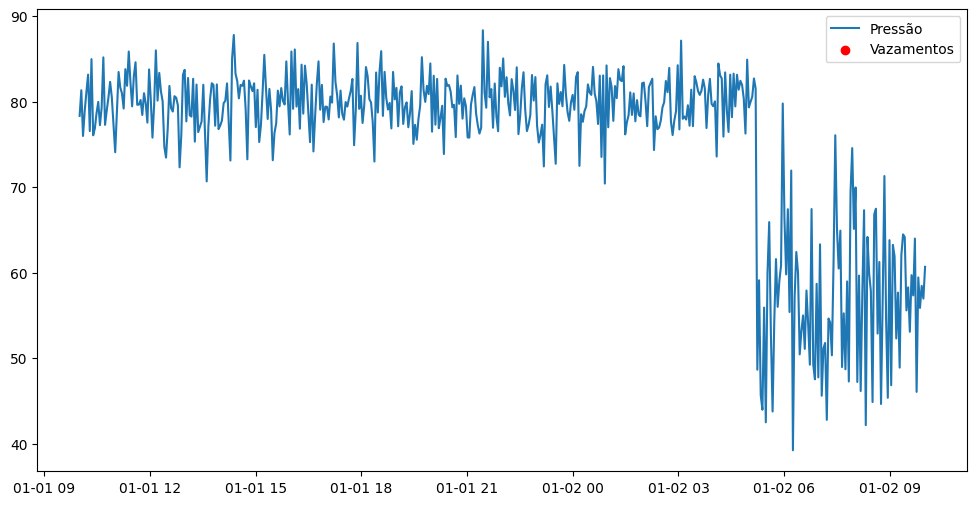

In [33]:
# Analisa os resultados
vazamentos = results[results['leak_alert'] == True]
print(f"Vazamentos detectados: {len(vazamentos)}")
print(f"Probabilidade média: {vazamentos['leak_probability'].mean():.1%}")

# Visualiza os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['timestamp'], results['pressure'], label='Pressão')
plt.scatter(vazamentos['timestamp'], vazamentos['pressure'], color='red', label='Vazamentos')
plt.legend()
plt.show()